In [10]:
import tensorflow as tf

In [11]:
print(tf.__version__)

2.2.0


In [12]:
import matplotlib as mpl

In [13]:
import matplotlib.pyplot as plt

In [14]:
import numpy as np

In [15]:
import sklearn

In [16]:
import pandas as pd

In [17]:
import os

In [18]:
import sys

In [19]:
import time

In [20]:
print(tf.__version__)

2.2.0


In [21]:
print(sys.version_info)

sys.version_info(major=3, minor=8, micro=2, releaselevel='final', serial=0)


In [23]:
from tensorflow import keras

In [24]:
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

matplotlib 3.2.1
numpy 1.18.5
pandas 1.0.4
sklearn 0.23.1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


### 1.获取数据集fashion_mnist

In [27]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

In [32]:
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

In [33]:
x_valid.shape

(5000, 28, 28)

In [34]:
y_valid.shape

(5000,)

In [35]:
x_train.shape

(55000, 28, 28)

In [36]:
y_train.shape

(55000,)

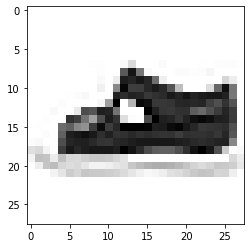

In [38]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap='binary')
    plt.show()

show_single_image(x_train[666])

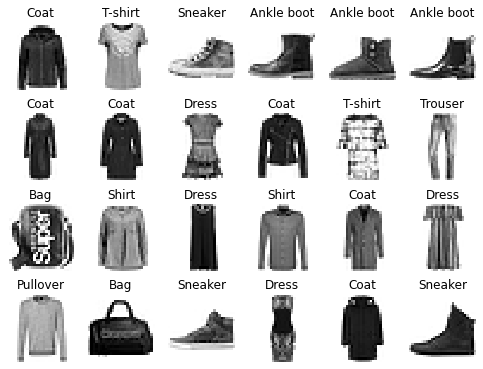

In [41]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_data[index], cmap='binary',
                      interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']

show_imgs(4, 6, x_train, y_train, class_names)

### 2.搭建分类模型

In [43]:
model = keras.models.Sequential()  # 初始化sequential
model.add(keras.layers.Flatten(input_shape=[28, 28]))  # 将传入的图片展平用一维向量表示

# 添加全连接层
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# 得到评估指标 loss指定多类损失函数，optimizer指定梯度下降优化
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(0.001),
             metrics=['accuracy'])


In [46]:
# 查看模型层数
model.layers

In [48]:
# 查看模型层次概要
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### 3.对模型进行训练

In [49]:
# epochs指定训练迭代次数
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 2.8367 - accuracy: 0.6906 - val_loss: 0.6781 - val_accuracy: 0.7632
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6188 - accuracy: 0.7711 - val_loss: 0.6101 - val_accuracy: 0.7854
Epoch 3/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5430 - accuracy: 0.7936 - val_loss: 0.5484 - val_accuracy: 0.8056
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4893 - accuracy: 0.8204 - val_loss: 0.5289 - val_accuracy: 0.8178
Epoch 5/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4490 - accuracy: 0.8375 - val_loss: 0.5164 - val_accuracy: 0.8278
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4242 - accuracy: 0.8450 - val_loss: 0.4940 - val_accuracy: 0.8356
Epoch 7/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4041 - accuracy: 0.8512 - val_loss: 0.4797 - val_accuracy:

### 4.用图表展示训练过程

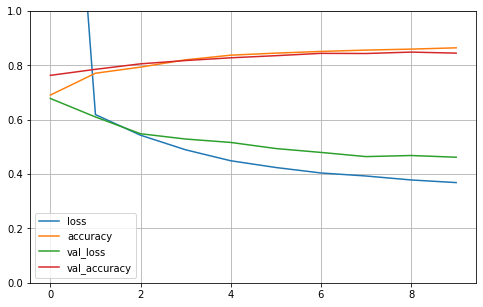

In [50]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

### 5.使用测试集评估模型优劣

In [51]:
model.evaluate(x_test, y_test, verbose=0)

[0.4757842719554901, 0.8355000019073486]